In [1]:
from nilearn.datasets import fetch_atlas_yeo_2011
from nilearn import plotting
import nibabel as nib

atlas = fetch_atlas_yeo_2011()
img = nib.load(atlas.thick_7)

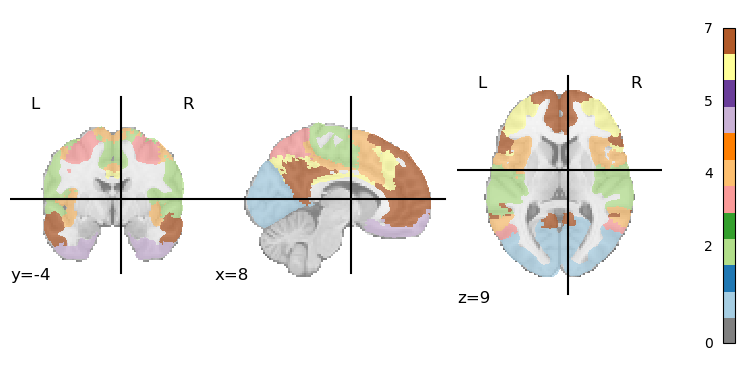

In [2]:

plotting.plot_roi(img, colorbar=True, cut_coords=(8, -4, 9), cmap="Paired")
plotting.show()

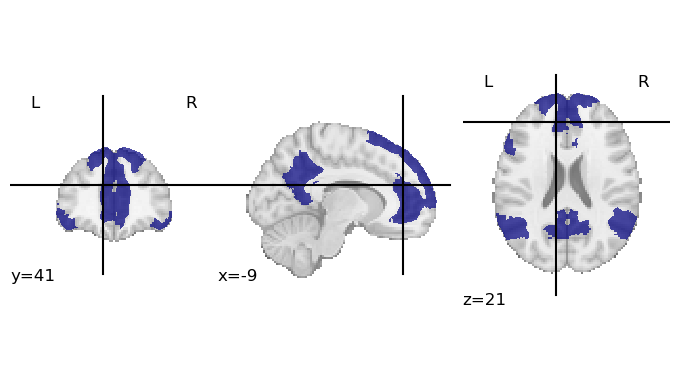

In [3]:
import numpy as np
arr = img.get_fdata()
dmn = np.where(arr == 7, 1, 0).astype(np.int32)[..., 0] # I don't understand that extra dimension
dmn_mask = nib.nifti1.Nifti1Image(dmn, img.affine)
plotting.plot_roi(dmn_mask)
plotting.show()

In [6]:
from pathlib import Path
from cogpred.utils.configuration import get_config
config = get_config()
exppath = Path(config["data_dir"]) / "dmn_yeo.nii.gz"
nib.save(dmn_mask, exppath)
exppath

PosixPath('/homes_unix/jlegrand/data/Memento/dmn_yeo.nii.gz')